In [1]:
%%javascript
function getQueryStringValue (key)
{  
    return unescape(window.location.search.replace(new RegExp("^(?:.*[&\\?]" + escape(key).replace(/[\.\+\*]/g, "\\$&") + "(?:\\=([^&]*))?)?.*$", "i"), "$1"));
}
IPython.notebook.kernel.execute("docID='".concat(getQueryStringValue("documentId")).concat("'"));

<IPython.core.display.Javascript object>

In [2]:
# setup a a testing case
try:
    if docID == '':
        docID = "2d40fbc518db4418b9c121bf47552fa4"
except NameError:
    docID = "2d40fbc518db4418b9c121bf47552fa4"

print("testing: ", docID)

testing:  2d40fbc518db4418b9c121bf47552fa4


In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import requests, json, os
from datetime import datetime, date, time
from ipywidgets import widgets  
from IPython import get_ipython
from IPython.display import display, Image, Markdown
from matplotlib import pylab
from pylab import *
from IPython.display import clear_output
import csv

In [4]:
cinergi_url = "http://cinergi.sdsc.edu/geoportal/rest/metadata/item/" + docID
print(cinergi_url)

http://cinergi.sdsc.edu/geoportal/rest/metadata/item/2d40fbc518db4418b9c121bf47552fa4


In [5]:
the_page = requests.get(cinergi_url)
the_json = json.loads(the_page.text)
doc_title = the_json['_source']['title']

In [6]:
# find wms link
wms_url =[link for link in the_json['_source']['links_s'] if "wms" in link][0]
wms_url = wms_url.split('?')[0]
print(wms_url)

http://www.esrl.noaa.gov/psd/thredds/wms/Datasets/ncep.marine/shum.mean.nc


In [7]:
from owslib.wms import WebMapService

In [8]:
wms = WebMapService(wms_url)
wms.identification.title

'NOAA/ESRL/PSD'

In [9]:
layer=list(wms.contents)[0]
print(wms[layer].title)
print(wms[layer].boundingBoxWGS84)
wms[layer].styles

Specific Humidity Monthly Mean at Surface
(-180.0, -89.0, 180.0, 89.0)


{'boxfill/rainbow': {'title': 'boxfill/rainbow',
  'legend': 'http://www.esrl.noaa.gov/psd/thredds/wms/Datasets/ncep.marine/shum.mean.nc?REQUEST=GetLegendGraphic&LAYER=shum&PALETTE=rainbow'},
 'boxfill/occam': {'title': 'boxfill/occam',
  'legend': 'http://www.esrl.noaa.gov/psd/thredds/wms/Datasets/ncep.marine/shum.mean.nc?REQUEST=GetLegendGraphic&LAYER=shum&PALETTE=occam'},
 'boxfill/redblue': {'title': 'boxfill/redblue',
  'legend': 'http://www.esrl.noaa.gov/psd/thredds/wms/Datasets/ncep.marine/shum.mean.nc?REQUEST=GetLegendGraphic&LAYER=shum&PALETTE=redblue'},
 'boxfill/ncview': {'title': 'boxfill/ncview',
  'legend': 'http://www.esrl.noaa.gov/psd/thredds/wms/Datasets/ncep.marine/shum.mean.nc?REQUEST=GetLegendGraphic&LAYER=shum&PALETTE=ncview'},
 'boxfill/sst_36': {'title': 'boxfill/sst_36',
  'legend': 'http://www.esrl.noaa.gov/psd/thredds/wms/Datasets/ncep.marine/shum.mean.nc?REQUEST=GetLegendGraphic&LAYER=shum&PALETTE=sst_36'},
 'boxfill/greyscale': {'title': 'boxfill/greyscale',

In [10]:
styles = list((wms[layer].styles).keys())
legend_url = wms[layer].styles[styles[0]]['legend']
img = wms.getmap(layers=[layer], styles=[styles[0]], srs='EPSG:4326',bbox=wms[layer].boundingBoxWGS84,size=(800, 600),format='image/png', transparent=True)

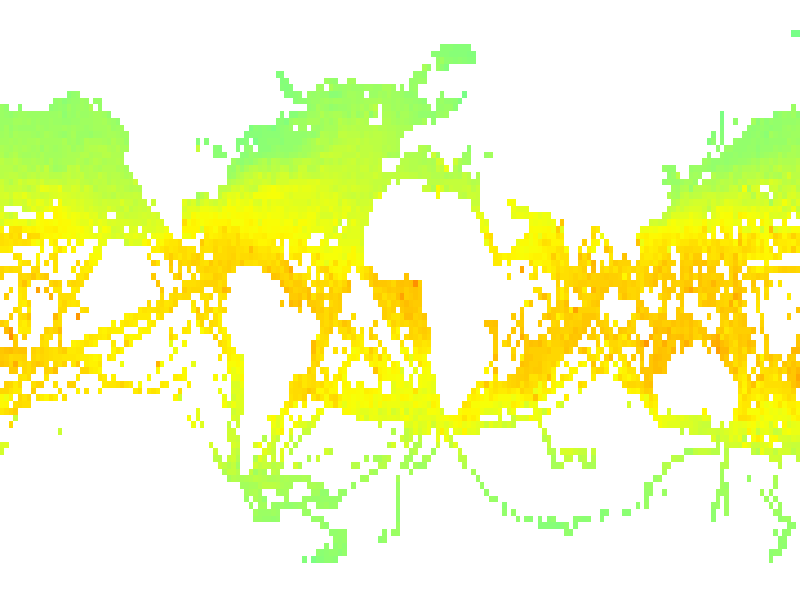

In [11]:
Image(img.read())

In [17]:
legend_image=Image(legend_url,format='png',height=100)

In [13]:
from ipyleaflet import Map,WMSLayer,basemaps,WidgetControl

In [26]:
m = Map(center=(0, -180), zoom=2,basemap=basemaps.Esri.WorldTopoMap)
wms1 = WMSLayer(
    url='http://www.esrl.noaa.gov/psd/thredds/wms/Datasets/ncep.marine/shum.mean.nc?',
    layers=layer,
    styles=styles[0],
    transparent=True,
    format="image/png"
)
m.add_layer(wms1)
display(Markdown('## ' + doc_title + ":" + wms[layer].title))
legend=legend_image
out = widgets.Output(layout={'border': '1px solid black'})
with out:
    display(legend)
widget_control = WidgetControl(widget=out, position='topright')
m.add_control(widget_control)
m

## NCEP Real-time Marine:Specific Humidity Monthly Mean at Surface

Map(basemap={'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/tile/{z}/{y}…